In [3]:
## importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder#for train test splitting
from sklearn.model_selection import train_test_split#for decision tree object
from sklearn.metrics import classification_report, confusion_matrix#for visualizing tree 
from sklearn.tree import plot_tree


In [4]:
# reading the dataset from google drive
data_set = pd.read_csv("/content/drive/MyDrive/Research Project/dataset/physical_activity_dataset.csv")

In [5]:
# printh the read data
data_set.head()

,Age,gender,weight,height,BloodPressure,cholestrol,Glucose,diabetes,discomfirt_chest,current_physical_activity_status,family_history_heart_disease,cigerette_consumption,class,Unnamed: 13
0,21.0,female,45.0,175.0,60.0,242.0,109.0,0.0,no,inactive,no,no,2.0,NaN
1,21.0,male,47.0,175.0,64.0,158.0,118.0,0.0,no,moderate,no,no,1.0,NaN
2,21.0,female,47.0,159.0,64.0,199.0,115.0,0.0,no,inactive,no,no,1.0,NaN
3,21.0,female,47.0,160.0,76.0,165.0,99.0,0.0,no,moderate,no,no,1.0,NaN
4,21.0,male,48.0,164.0,55.0,200.0,80.0,0.0,no,moderate,no,no,2.0,NaN


In [7]:
# getting thr information of the dataset
data_set.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785 entries, 0 to 784
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               768 non-null    float64
 1   gender                            768 non-null    object 
 2   weight                            768 non-null    float64
 3   height                            768 non-null    float64
 4   BloodPressure                     768 non-null    float64
 5   cholestrol                        758 non-null    float64
 6   Glucose                           768 non-null    float64
 7   diabetes                          768 non-null    float64
 8   discomfirt_chest                  768 non-null    object 
 9   current_physical_activity_status  768 non-null    object 
 10  family_history_heart_disease      768 non-null    object 
 11  cigerette_consumption             768 non-null    object 
 12  class   

In [10]:
# checking weather there are any nulls
data_set.isnull().any()

# selecting dataset
data_set.drop(data_set.columns[13], axis=1, inplace=True)

In [12]:
# dropping the nullls
cleaned_dataset = data_set.dropna()

In [13]:
# describe the cleaned dataset
cleaned_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 758 entries, 0 to 767
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               758 non-null    float64
 1   gender                            758 non-null    object 
 2   weight                            758 non-null    float64
 3   height                            758 non-null    float64
 4   BloodPressure                     758 non-null    float64
 5   cholestrol                        758 non-null    float64
 6   Glucose                           758 non-null    float64
 7   diabetes                          758 non-null    float64
 8   discomfirt_chest                  758 non-null    object 
 9   current_physical_activity_status  758 non-null    object 
 10  family_history_heart_disease      758 non-null    object 
 11  cigerette_consumption             758 non-null    object 
 12  class   

In [14]:
## onehot encoding
## Data transformation

# categorical_columns
categorical_columns = ["diabetes","gender","discomfirt_chest","current_physical_activity_status","family_history_heart_disease","cigerette_consumption"]
categorical_columns_enc = ["diabetes_","gender_","discomfirt_chest_","current_physical_activity_status_","family_history_heart_disease_","cigerette_consumption_"]
# one hot encoding
cleaned_dataset[categorical_columns_enc] = cleaned_dataset[categorical_columns].apply(lambda x: pd.factorize(x)[0])
cleaned_dataset.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Age,gender,weight,height,BloodPressure,cholestrol,Glucose,diabetes,discomfirt_chest,current_physical_activity_status,family_history_heart_disease,cigerette_consumption,class,diabetes_,gender_,discomfirt_chest_,current_physical_activity_status_,family_history_heart_disease_,cigerette_consumption_
0,21.0,female,45.0,175.0,60.0,242.0,109.0,0.0,no,inactive,no,no,2.0,0,0,0,0,0,0
1,21.0,male,47.0,175.0,64.0,158.0,118.0,0.0,no,moderate,no,no,1.0,0,1,0,1,0,0
2,21.0,female,47.0,159.0,64.0,199.0,115.0,0.0,no,inactive,no,no,1.0,0,0,0,0,0,0
3,21.0,female,47.0,160.0,76.0,165.0,99.0,0.0,no,moderate,no,no,1.0,0,0,0,1,0,0
4,21.0,male,48.0,164.0,55.0,200.0,80.0,0.0,no,moderate,no,no,2.0,0,1,0,1,0,0


In [15]:
# take data needed for classification model
processed_data = cleaned_dataset[["Age","gender_","weight","height","BloodPressure","cholestrol","Glucose","diabetes_","discomfirt_chest_",
               "current_physical_activity_status_","family_history_heart_disease_","cigerette_consumption_","class"]]

In [16]:
# print the processed data
processed_data.head()

,Age,gender_,weight,height,BloodPressure,cholestrol,Glucose,diabetes_,discomfirt_chest_,current_physical_activity_status_,family_history_heart_disease_,cigerette_consumption_,class
0,21.0,0,45.0,175.0,60.0,242.0,109.0,0,0,0,0,0,2.0
1,21.0,1,47.0,175.0,64.0,158.0,118.0,0,0,1,0,0,1.0
2,21.0,0,47.0,159.0,64.0,199.0,115.0,0,0,0,0,0,1.0
3,21.0,0,47.0,160.0,76.0,165.0,99.0,0,0,1,0,0,1.0
4,21.0,1,48.0,164.0,55.0,200.0,80.0,0,0,1,0,0,2.0


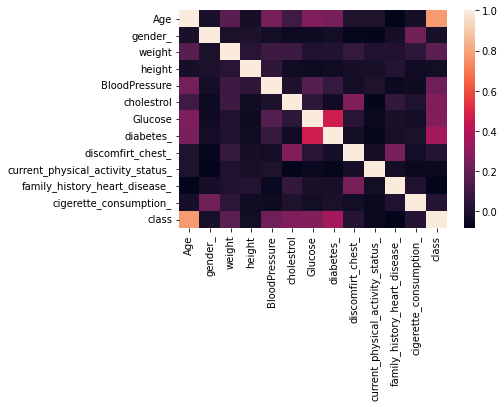

In [17]:
## get the correlation matrix
sns.heatmap(processed_data.corr())

In [18]:
# seperating target variable and the features
target = processed_data['class']
df1 = processed_data.copy()
df1 = df1.drop('class', axis =1)

In [19]:
## defining the attributes
x = df1
y = target

In [20]:
## splitting the dataset to training and testing 
# Splitting the data - 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(x , y, test_size = 0.3, random_state = 42)
print("Training split input- ", X_train.shape)
print("Testing split input- ", X_test.shape)

Training split input-  (530, 12)
Testing split input-  (228, 12)


In [21]:
## importing libraries needed for deep learning model
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

In [26]:
## defining neural network model
# define baseline model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(15, input_dim=12, activation='relu'))
	model.add(Dense(4, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [27]:
## defining the estimator or the classifier
estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5, verbose=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  


In [28]:
## splitting the dataset for n folds
kfold = KFold(n_splits=10, shuffle=True)

In [29]:
## learn the model and get the results
results = cross_val_score(estimator, X_train, y_train, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 84.34% (5.60%)
